### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
### 1) Delivery_time -> Predict delivery time using sorting time 

In [4]:
import pandas as pd

data = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/ExcelR_course/DS/Assignments/4.Simple Linear Regression/Dataset/delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
## Check Correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

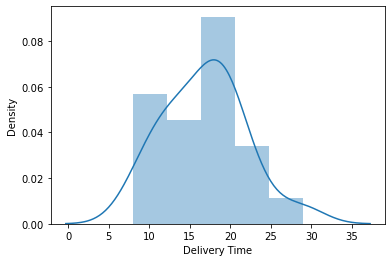

In [15]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

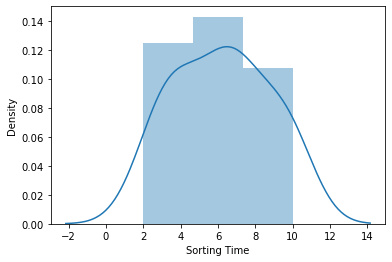

In [16]:
sns.distplot(data['Sorting Time'])

### Fitting a Linear Regression Model

In [22]:
# Renaming Columns as space is there
dataset=data.rename({'Delivery Time':'Delivery_time', 'Sorting Time':'Sorting_time'},axis=1)
dataset

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='Sorting_time', ylabel='Delivery_time'>

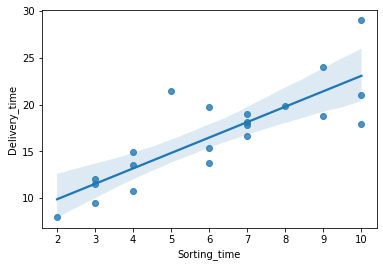

In [24]:
sns.regplot(x=dataset['Sorting_time'],y=dataset['Delivery_time'])

In [25]:
model=smf.ols("Delivery_time~Sorting_time",data=dataset).fit()

In [26]:
#Coefficients
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [28]:
#t and p-Values
(model.tvalues, model.pvalues)   

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

In [29]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Predict for new data point

In [39]:
#Predict for 6 and 11 sorting time
newdata=pd.Series([6,10])

In [40]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])

In [41]:
model.predict(data_pred)

0    16.476853
1    23.072933
dtype: float64

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
### 2) Salary_hike -> Build a prediction model for Salary_hike

In [42]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf 

In [43]:
sal_data = pd.read_csv("C:/Users/aksha/OneDrive/Desktop/ExcelR_course/DS/Assignments/4.Simple Linear Regression/Dataset/Salary_Data.csv")
sal_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [45]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [47]:
# check correlation

sal_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

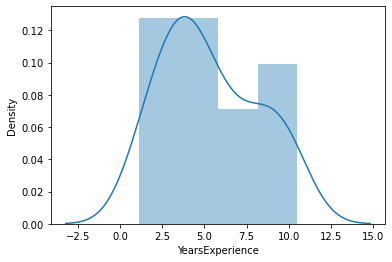

In [48]:
sns.distplot(sal_data['YearsExperience'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

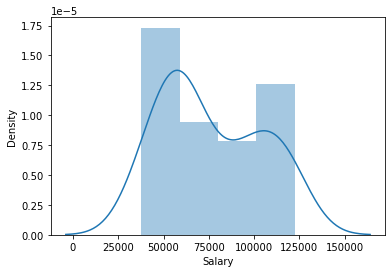

In [49]:
sns.distplot(sal_data['Salary'])

### Fitting a Linear Regression Model

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

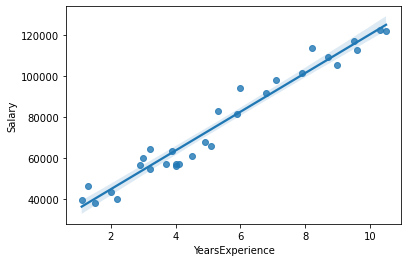

In [50]:
sns.regplot(x=sal_data['YearsExperience'],y=sal_data['Salary'])

In [51]:
salary_model=smf.ols("Salary~YearsExperience",data=sal_data).fit()

In [52]:
#Coefficients
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [53]:
#t and p-Values
(salary_model.tvalues, salary_model.pvalues)   

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [54]:
#R squared values
(salary_model.rsquared,salary_model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## Predict for new data point

In [62]:
#Predict for 4 and 6 years of ecperience
newdata=pd.Series([4,6])

In [63]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,4
1,6


In [64]:
salary_model.predict(data_pred)

0    63592.049484
1    82491.974127
dtype: float64